In [2]:
# from api_calls import *
from api_calls import mongoConn

In [3]:
client = mongoConn()

Pinged your deployment. You successfully connected to MongoDB!


In [4]:
def delete_documents(client, mongo_db, mongo_collection, match_criteria):
    """
    Delete documents from a MongoDB collection that match certain criteria.

    Parameters
    ----------
    client : MongoClient
        MongoDB client instance.
    mongo_db : str
        Name of the MongoDB database.
    mongo_collection : str
        Name of the MongoDB collection.
    match_criteria : dict
        Dictionary of fields and their values to match for deletion.
        Example: {"Week": 12, "Year": 2024}

    Returns
    -------
    None
    """

    # Connect to the database and collection
    database = client[mongo_db]
    collection = database[mongo_collection]

    # Handle special case to delete all documents
    if match_criteria == {"All": "All"}:
        collection.delete_many({})
        print(f"Deleted all documents in the '{mongo_collection}' collection.")
        return

    # Delete documents matching the criteria
    result = collection.delete_many(match_criteria)

    # Print the number of deleted documents
    print(f"Deleted {result.deleted_count} documents matching criteria: {match_criteria}.")


In [5]:
delete_documents(client, "withTheSpread", "season_spreads", {"Week": 13, "Year": 2024})


Deleted 62 documents matching criteria: {'Week': 12, 'Year': 2024}.


In [4]:
!pip install pymongo

  Using cached dnspython-2.4.2-py3-none-any.whl (300 kB)


In [6]:
from pymongo import MongoClient

def delete_duplicates(client, mongo_db, mongo_collection, match_criteria, unique_field):
    """
    Delete duplicate documents from a MongoDB collection based on a matching filter.

    Parameters
    ----------
    client : MongoClient
        MongoDB client instance.
    mongo_db : str
        Name of the MongoDB database.
    mongo_collection : str
        Name of the MongoDB collection.
    match_criteria : dict
        Dictionary to filter documents. Example: {"Year": 2024, "Week": 13}.
    unique_field : str
        The field used to determine uniqueness for deduplication.

    Returns
    -------
    None
    """
    # Connect to the database and collection
    database = client[mongo_db]
    collection = database[mongo_collection]

    # Find duplicates
    pipeline = [
        {"$match": match_criteria},
        {"$group": {
            "_id": f"${unique_field}",  # Group by the unique field
            "ids": {"$push": "$_id"},  # Collect all IDs in this group
            "count": {"$sum": 1}  # Count the number of documents in the group
        }},
        {"$match": {"count": {"$gt": 1}}}  # Only groups with more than 1 document
    ]

    duplicates = list(collection.aggregate(pipeline))

    # Delete duplicates while keeping one document
    for duplicate in duplicates:
        ids_to_delete = duplicate["ids"][1:]  # Keep the first ID, delete the rest
        collection.delete_many({"_id": {"$in": ids_to_delete}})

    print(f"Deleted duplicates for criteria: {match_criteria}")

# Example Usage
# client = MongoClient("mongodb://localhost:27017/")
delete_duplicates(client, "withTheSpread", "season_spreads", {"Year": 2024, "Week": 13}, "unique_field_name")


Deleted duplicates for criteria: {'Year': 2024, 'Week': 13}


In [ ]:
delete_documents(client, 'withTheSpread', 'season_spreads_backup', 'All', 'All')
add_to_db(client,'withTheSpread','season_spreads_backup',dfseasonspreads_full)

In [734]:
##Update scores, spreads, spreadscores from previous week

#### start model dataset creation

In [ ]:
def create_spread():
    pass ## no longer needs this function, serves to learn!
#     ## import spreadsheet and select timeframe of interest
#     # create dictionary of teams and shortnames
#     teams_save = ['Chicago Bears', 'Arizona Cardinals', 'Carolina Panthers',
#                   'Cleveland Browns', 'Dallas Cowboys', 'Jacksonville Jaguars',
#                   'Los Angeles Chargers', 'Miami Dolphins', 'Minnesota Vikings',
#                   'New England Patriots', 'New York Jets', 'Philadelphia Eagles',
#                   'Seattle Seahawks', 'Tampa Bay Buccaneers', 'New Orleans Saints',
#                   'Las Vegas Raiders', 'Atlanta Falcons', 'Baltimore Ravens',
#                   'Cincinnati Bengals', 'Denver Broncos', 'Detroit Lions', 'Los Angeles Chargers',
#                   'Green Bay Packers', 'Houston Texans', 'Los Angeles Rams',
#                   'New York Giants', 'Pittsburgh Steelers', 'Tennessee Titans',
#                   'Washington Commanders', 'Buffalo Bills', 'Indianapolis Colts',
#                   'Kansas City Chiefs', 'San Francisco 49ers']
#
#     ids = ['CHI', 'ARI', 'CAR', 'CLE', 'DAL', 'JAC', 'LAC', 'MIA', 'MIN', 'NE',
#            'NYJ', 'PHI', 'SEA', 'TB', 'NO', 'LVR', 'ATL', 'BAL', 'CIN', 'DEN',
#            'DET', 'LAC', 'GB', 'HOU', 'LAR', 'NYG', 'PIT', 'TEN', 'WAS', 'BUF',
#            'IND', 'KC', 'SF']
#     teamids = {teams_save[i]: ids[i] for i in range(len(teams_save))}
#
#     dfnfl = pd.read_csv('data/spreadspoke_scores.csv')
#     dfnfl.loc[:, 'gamedate'] = pd.to_datetime(dfnfl.loc[:, 'schedule_date'])
#     dfnfl['scoredif'] = dfnfl['score_home'] - dfnfl['score_away']
#     dfnfltime = dfnfl[dfnfl['gamedate'] > pd.to_datetime('2000-07-15')].copy()
#     # dfnfltime = dfnfltime[dfnfltime['gamedate'] < pd.to_datetime('2021-1-31')]
#     dfnfltime = dfnfltime[dfnfltime['schedule_playoff'] == False].copy()
#     dfnfltime['schedule_week'] = pd.to_numeric(dfnfltime['schedule_week'])
#     dfnfltime = dfnfltime.replace('Washington Redskins', 'Washington Commanders')
#     dfnfltime = dfnfltime.replace('Washington Football Team', 'Washington Commanders')
#     dfnfltime = dfnfltime.replace('Oakland Raiders', 'Las Vegas Raiders')
#     dfnfltime = dfnfltime.replace('St. Louis Rams', 'Los Angeles Rams')
#     dfnfltime = dfnfltime.replace('San Diego Chargers', 'Los Angeles Chargers')
#
#     # split dataframe from game indexed (home and away) to each teams score and spread
#     dfnfltimehome = dfnfltime[['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
#                                'team_home', 'score_home', 'team_favorite_id', 'spread_favorite', 'gamedate',
#                                'scoredif']].copy()
#     dfnfltimehome.loc[:, 'team'] = dfnfltimehome['team_home'].copy()
#     dfnfltimehome.loc[:, 'score'] = dfnfltimehome['score_home'].copy()
#     dfnfltimehome['scoredif'] = dfnfltimehome['scoredif'].copy()
#     dfnfltimeaway = dfnfltime[['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
#                                'team_away', 'score_away', 'team_favorite_id', 'spread_favorite', 'gamedate',
#                                'scoredif']].copy()
#     dfnfltimeaway.loc[:, 'team'] = dfnfltimeaway['team_away'].copy()
#     dfnfltimeaway.loc[:, 'score'] = dfnfltimeaway['score_away'].copy()
#     dfnfltimeaway.loc[:, 'scoredif'] = -dfnfltimeaway['scoredif'].copy()
#     dfnfltimesingle = pd.concat([dfnfltimehome.copy(), dfnfltimeaway.copy()])
#     dfnfltimesingle.drop(['score_home', 'team_home', 'team_away', 'score_away'], axis=1, inplace=True)
#     dfnfltimesingle = dfnfltimesingle.sort_values(['schedule_season', 'schedule_week']).copy()
#
#     # calculate each teams score ATS and whether covered ATS
#     def spread(team, team_favorite_id, scoredif, spread_favorite, teamids):
#         if teamids[team] == team_favorite_id:
#             spreadscore = scoredif + spread_favorite
#         else:
#             spreadscore = scoredif - spread_favorite
#         return spreadscore
#
#     dfnfltimesingle['spreadscore'] = dfnfltimesingle.apply(
#         lambda row: spread(row['team'], row['team_favorite_id'], row['scoredif'], row['spread_favorite'], teamids),
#         axis=1)
#
#     # regular season only
#     # dfnfltimesingle = dfnfltimesingle[dfnfltimesingle['schedule_playoff'] == False].copy()
#     dfnfltimesingle = dfnfltimesingle[dfnfltimesingle['schedule_week'] < 18].copy()
#     dfnfltimesingle.drop(['schedule_playoff'], axis=1, inplace=True)
#     dfnfltimesingle = dfnfltimesingle.reset_index().copy()
#     dfnfltimesingle
#
#     ### get each teams score ATS each week of the season, concat seasons vertically
#     years = dfnfltimesingle['schedule_season'].unique()
#     years = list(range(2000, 2021))
#     print(years)
#     dfspreadall = []
#
#     for year in years:
#         print(year)
#         dfnfltimesingleloop = dfnfltimesingle[dfnfltimesingle['schedule_season'] == year].copy()
#
#         # create dataframe of score ATS for each team through the season
#         dfspread = pd.DataFrame(
#             dfnfltimesingleloop[dfnfltimesingle['team'] == teams_save[0]]['spreadscore']).copy().reset_index(drop=True)
#         for team in teams_save:
#
#             if team != teams_save[0]:
#                 seasonspread = pd.DataFrame(
#                     dfnfltimesingleloop[dfnfltimesingleloop['team'] == team]['spreadscore']).reset_index(drop=True)
#                 dfspread = pd.concat([dfspread, seasonspread], axis=1)
#         dfspread.columns = teams_save
#         dfspread = dfspread.transpose()
#
#         dfspread.dropna(inplace=True)
#         dfspread['Year'] = year
#         dfspreadall.append(dfspread)
#     dfspreadall = pd.concat(dfspreadall)
#     return dfspreadall.reset_index().rename(columns={'index':"Team",0: "Week_1", 1: "Week_2",2: "Week_3", 3: "Week_4",4: "Week_5", 5: "Week_6",6: "Week_7", 7: "Week_8",8: "Week_9", 9: "Week_10",10: "Week_11", 11: "Week_12",12: "Week_13", 13: "Week_14",14: "Week_15", 15: "Week_16"})
# dfspread = create_spread()

In [1]:
import pandas as pd

teams_save = ['Chicago Bears', 'Arizona Cardinals', 'Carolina Panthers',
              'Cleveland Browns', 'Dallas Cowboys', 'Jacksonville Jaguars',
              'Los Angeles Chargers', 'Miami Dolphins', 'Minnesota Vikings',
              'New England Patriots', 'New York Jets', 'Philadelphia Eagles',
              'Seattle Seahawks', 'Tampa Bay Buccaneers', 'New Orleans Saints',
              'Las Vegas Raiders', 'Atlanta Falcons', 'Baltimore Ravens',
              'Cincinnati Bengals', 'Denver Broncos', 'Detroit Lions', 'Los Angeles Chargers',
              'Green Bay Packers', 'Houston Texans', 'Los Angeles Rams',
              'New York Giants', 'Pittsburgh Steelers', 'Tennessee Titans',
              'Washington Commanders', 'Buffalo Bills', 'Indianapolis Colts',
              'Kansas City Chiefs', 'San Francisco 49ers']

ids = ['CHI', 'ARI', 'CAR', 'CLE', 'DAL', 'JAC', 'LAC', 'MIA', 'MIN', 'NE',
       'NYJ', 'PHI', 'SEA', 'TB', 'NO', 'LVR', 'ATL', 'BAL', 'CIN', 'DEN',
       'DET', 'LAC', 'GB', 'HOU', 'LAR', 'NYG', 'PIT', 'TEN', 'WAS', 'BUF',
       'IND', 'KC', 'SF']
teamids = {teams_save[i]: ids[i] for i in range(len(teams_save))}

dfnfl = pd.read_csv('data/spreadspoke_scores.csv')
dfnfl.loc[:, 'gamedate'] = pd.to_datetime(dfnfl.loc[:, 'schedule_date'])
dfnfl['scoredif'] = dfnfl['score_home'] - dfnfl['score_away']
dfnfltime = dfnfl[dfnfl['gamedate'] > pd.to_datetime('2000-07-15')].copy()
# dfnfltime = dfnfltime[dfnfltime['gamedate'] < pd.to_datetime('2021-1-31')]
dfnfltime = dfnfltime[dfnfltime['schedule_playoff'] == False].copy()
dfnfltime['schedule_week'] = pd.to_numeric(dfnfltime['schedule_week'])
dfnfltime = dfnfltime.replace('Washington Redskins', 'Washington Commanders')
dfnfltime = dfnfltime.replace('Washington Football Team', 'Washington Commanders')
dfnfltime = dfnfltime.replace('Oakland Raiders', 'Las Vegas Raiders')
dfnfltime = dfnfltime.replace('St. Louis Rams', 'Los Angeles Rams')
dfnfltime = dfnfltime.replace('San Diego Chargers', 'Los Angeles Chargers')

In [2]:
dfnfltime

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,gamedate,scoredif
7354,9/3/2000,2000,1,False,Atlanta Falcons,36,28,San Francisco 49ers,ATL,-6.5,46.5,Georgia Dome,False,72.0,0.0,NaN,indoor,2000-09-03,8
7355,9/3/2000,2000,1,False,Buffalo Bills,16,13,Tennessee Titans,BUF,-1.0,40,Ralph Wilson Stadium,False,70.0,7.0,82.0,NaN,2000-09-03,3
7356,9/3/2000,2000,1,False,Cleveland Browns,7,27,Jacksonville Jaguars,JAX,-10.5,38.5,FirstEnergy Stadium,False,75.0,8.0,86.0,NaN,2000-09-03,-20
7357,9/3/2000,2000,1,False,Dallas Cowboys,14,41,Philadelphia Eagles,DAL,-6.0,39.5,Texas Stadium,False,95.0,7.0,32.0,NaN,2000-09-03,-27
7358,9/3/2000,2000,1,False,Green Bay Packers,16,20,New York Jets,GB,-2.5,44,Lambeau Field,False,69.0,13.0,87.0,NaN,2000-09-03,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13498,1/8/2023,2022,18,False,Philadelphia Eagles,22,16,New York Giants,PHI,-17.0,43,Lincoln Financial Field,False,NaN,NaN,NaN,NaN,2023-01-08,6
13499,1/8/2023,2022,18,False,Pittsburgh Steelers,28,14,Cleveland Browns,PIT,-2.5,40,Acrisure Stadium,False,NaN,NaN,NaN,NaN,2023-01-08,14
13500,1/8/2023,2022,18,False,San Francisco 49ers,38,13,Arizona Cardinals,SF,-14.5,40,Levi's Stadium,False,NaN,NaN,NaN,NaN,2023-01-08,25
13501,1/8/2023,2022,18,False,Seattle Seahawks,19,16,Los Angeles Rams,SEA,-4.5,43,Lumen Field,False,NaN,NaN,NaN,NaN,2023-01-08,3


In [3]:
def gameSpreadScore_v0(team_home, team_away, team_favorite_id, scoredif, spread_favorite,teamids,week,year):
    if teamids[team_home] == team_favorite_id:
        spreadscore = scoredif + spread_favorite
        # homespread = spread_favorite
    else:
        spreadscore = scoredif - spread_favorite
        # homespread = -spread_favorite

    return team_home, spreadscore,team_away,-spreadscore,week,year#,homespread,-homespread,overunder

In [3]:
def gameSpreadScore(team_home, team_away, team_favorite_id, scoredif, spread_favorite,teamids,week,year,overunder):
    if teamids[team_home] == team_favorite_id:
        spreadscore = scoredif + spread_favorite
        homespread = spread_favorite
    else:
        spreadscore = scoredif - spread_favorite
        homespread = -spread_favorite

    return team_home, spreadscore,team_away,-spreadscore,week,year,homespread,-homespread,overunder

dfnflspread_zip = dfnfltime.apply(lambda row: gameSpreadScore(row['team_home'],row['team_away'], row['team_favorite_id'], row['scoredif'], row['spread_favorite'],teamids,row['schedule_week'],row['schedule_season'],row['over_under_line']), axis=1).apply(pd.Series)
dfnflspread_zip

,0,1,2,3,4,5,6,7,8
7354,Atlanta Falcons,1.5,San Francisco 49ers,-1.5,1,2000,-6.5,6.5,46.5
7355,Buffalo Bills,2.0,Tennessee Titans,-2.0,1,2000,-1.0,1.0,40
7356,Cleveland Browns,-9.5,Jacksonville Jaguars,9.5,1,2000,10.5,-10.5,38.5
7357,Dallas Cowboys,-33.0,Philadelphia Eagles,33.0,1,2000,-6.0,6.0,39.5
7358,Green Bay Packers,-6.5,New York Jets,6.5,1,2000,-2.5,2.5,44
...,...,...,...,...,...,...,...,...,...
13498,Philadelphia Eagles,-11.0,New York Giants,11.0,18,2022,-17.0,17.0,43
13499,Pittsburgh Steelers,11.5,Cleveland Browns,-11.5,18,2022,-2.5,2.5,40
13500,San Francisco 49ers,10.5,Arizona Cardinals,-10.5,18,2022,-14.5,14.5,40
13501,Seattle Seahawks,-1.5,Los Angeles Rams,1.5,18,2022,-4.5,4.5,43


In [4]:
dfspread = pd.concat([dfnflspread_zip[[0,1,4,5]],dfnflspread_zip[[2,3,4,5]].rename(columns={2:0,3:1})]).rename(columns={0:'Team',1:'Spread',4:'Week',5:'Year'}).set_index(['Team','Year','Week']).unstack()
dfspread.columns = dfspread.columns.droplevel()
# dfspread.columns = ['Week_'+str(i) for i in dfspread.columns]
dfspread['teamyearid'] = dfspread.index.map(lambda x: '-'.join(map(str, x)))
dfspread['Bet'] = 'SpreadScore'
dfspread.set_index(['teamyearid','Bet'],inplace=True,append=True)

dfspreadts = dfspread.T
# dfspread.to_csv('data/dfspread.csv')
dfspread

dfprespread = pd.concat([dfnflspread_zip[[0,6,4,5]],dfnflspread_zip[[2,7,4,5]].rename(columns={2:0,7:6})]).rename(columns={0:'Team',1:'Spread',4:'Week',5:'Year'}).set_index(['Team','Year','Week']).unstack()
dfprespread.columns = dfprespread.columns.droplevel()
# dfspread.columns = ['Week_'+str(i) for i in dfspread.columns]
dfprespread['teamyearid'] = dfprespread.index.map(lambda x: '-'.join(map(str, x)))
dfprespread['Bet'] = 'Spread'
dfprespread.set_index(['teamyearid','Bet'],inplace=True,append=True)

dfoverunder = pd.concat([dfnflspread_zip[[0,8,4,5]],dfnflspread_zip[[2,8,4,5]].rename(columns={2:0})]).rename(columns={0:'Team',1:'OverUnder',4:'Week',5:'Year'}).set_index(['Team','Year','Week']).unstack()
dfoverunder.columns = dfoverunder.columns.droplevel()
# dfspread.columns = ['Week_'+str(i) for i in dfspread.columns]
dfoverunder['teamyearid'] = dfoverunder.index.map(lambda x: '-'.join(map(str, x)))
dfoverunder['Bet'] = 'OverUnder'
dfoverunder.set_index(['teamyearid','Bet'],inplace=True,append=True)

# dfspreadts = dfspread.T
# dfprespread.to_csv('data/dfprespread.csv')
dfbets = pd.concat([dfspread, dfoverunder,dfprespread],axis=0)
dfbets.to_csv('data/dfbets.csv')

In [43]:
dfspread = pd.concat([dfnflspread_zip[[0,1,4,5]],dfnflspread_zip[[2,3,4,5]].rename(columns={2:0,3:1})]).rename(columns={0:'Team',1:'Spread',4:'Week',5:'Year'}).set_index(['Team','Year','Week']).unstack()
dfspread.columns = dfspread.columns.droplevel()
# dfspread.columns = ['Week_'+str(i) for i in dfspread.columns]
dfspread['teamyearid'] = dfspread.index.map(lambda x: '-'.join(map(str, x)))
dfspread.set_index('teamyearid',inplace=True,append=True)

dfspreadts = dfspread.T
# dfspread.to_csv('data/dfspread.csv')
dfspread

Week                                                      1     2     3     4  \
Team                  Year teamyearid                                           
Arizona Cardinals     2000 Arizona Cardinals-2000       1.5  -2.0   NaN -27.0   
                      2001 Arizona Cardinals-2001       NaN -12.5 -17.0  15.5   
                      2002 Arizona Cardinals-2002      -2.0  15.0  -5.5  17.0   
                      2003 Arizona Cardinals-2003     -14.5 -33.0  14.5 -12.5   
                      2004 Arizona Cardinals-2004       4.0  -3.0   8.0  27.5   
...                                                     ...   ...   ...   ...   
Washington Commanders 2018 Washington Commanders-2018  20.0 -18.0  16.5   NaN   
                      2019 Washington Commanders-2019   5.0  -4.0 -11.0 -18.0   
                      2020 Washington Commanders-2020  15.0  -8.0  -7.0   0.0   
                      2021 Washington Commanders-2021  -3.0  -2.0 -15.0   2.0   
                      2022 Washington Commanders-2022   3.0  -8.0 -10.0 -12.0   

Week                                                      5     6     7     8  \
Team                  Year teamyearid                                           
Arizona Cardinals     2000 Arizona Cardinals-2000      -3.5   3.5 -16.5 -34.0   
                      2001 Arizona Cardinals-2001      -0.0  10.0 -17.0  -7.0   
                      2002 Arizona Cardinals-2002       8.0   NaN  -0.5  -1.5   
                      2003 Arizona Cardinals-2003      -9.5  -1.5   NaN  10.0   
                      2004 Arizona Cardinals-2004      -2.0   NaN  14.5 -19.5   
...                                                     ...   ...   ...   ...   
Washington Commanders 2018 Washington Commanders-2018 -18.5   7.0   4.0   6.0   
                      2019 Washington Commanders-2019  -9.5  -4.5   1.0   6.5   
                      2020 Washington Commanders-2020 -13.0   1.5  21.0   NaN   
                      2021 Washington Commanders-2021  -8.5 -11.5  -5.5  -3.0   
                      2022 Washington Commanders-2022  -3.0   4.0   6.0   4.0   

Week                                                      9    10    11    12  \
Team                  Year teamyearid                                           
Arizona Cardinals     2000 Arizona Cardinals-2000      -5.0  11.0  -4.5 -18.0   
                      2001 Arizona Cardinals-2001      -1.5   5.0  10.0  16.0   
                      2002 Arizona Cardinals-2002      -8.0 -24.0 -12.0 -11.5   
                      2003 Arizona Cardinals-2003       6.0  -6.0 -33.0   4.0   
                      2004 Arizona Cardinals-2004       4.0   2.0 -22.0  -7.0   
...                                                     ...   ...   ...   ...   
Washington Commanders 2018 Washington Commanders-2018 -25.5  16.5   1.0  -1.0   
                      2019 Washington Commanders-2019  -4.5   NaN -19.0   7.0   
                      2020 Washington Commanders-2020  -5.5  -0.0   9.5  28.0   
                      2021 Washington Commanders-2021   NaN  20.0   9.0   3.5   
                      2022 Washington Commanders-2022   0.0  22.0  10.0   2.5   

Week                                                     13    14    15    16  \
Team                  Year teamyearid                                           
Arizona Cardinals     2000 Arizona Cardinals-2000     -18.0  -7.0 -49.0   9.0   
                      2001 Arizona Cardinals-2001     -12.0   1.0   3.5  24.0   
                      2002 Arizona Cardinals-2002     -40.0   4.0   9.0   0.5   
                      2003 Arizona Cardinals-2003     -20.5 -25.5   4.0  -2.5   
                      2004 Arizona Cardinals-2004      -8.0 -10.0  27.0   4.0   
...                                                     ...   ...   ...   ...   
Washington Commanders 2018 Washington Commanders-2018  -9.5 -21.0  -4.5   2.5   
                      2019 Washington Commanders-2019  18.5   8.0  -3.5  -5.0   
                      2020 W

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBRegressor,XGBClassifier
from sklearn.model_selection import train_test_split
# from gluonts.dataset.common import ListDataset
# from gluonts.torch.model.deepar.estimator import DeepAREstimator
# from gluonts.mx.trainer import Trainer
# from gluonts.mx.evaluation import Evaluator
# from gluonts.mx.evaluation.backtest import make_evaluation_predictions

In [6]:
dfmodel = dfspread.loc[pd.IndexSlice[2022] != dfspread.index.get_level_values('Year')]
dfval = dfspread.loc[pd.IndexSlice[2022] == dfspread.index.get_level_values('Year')]
dfmodel

Week                                                                  1     2  \
Team                  Year teamyearid                 Bet                       
Arizona Cardinals     2000 Arizona Cardinals-2000     SpreadScore   1.5  -2.0   
                      2001 Arizona Cardinals-2001     SpreadScore   NaN -12.5   
                      2002 Arizona Cardinals-2002     SpreadScore  -2.0  15.0   
                      2003 Arizona Cardinals-2003     SpreadScore -14.5 -33.0   
                      2004 Arizona Cardinals-2004     SpreadScore   4.0  -3.0   
...                                                                 ...   ...   
Washington Commanders 2017 Washington Commanders-2017 SpreadScore -12.0   9.5   
                      2018 Washington Commanders-2018 SpreadScore  20.0 -18.0   
                      2019 Washington Commanders-2019 SpreadScore   5.0  -4.0   
                      2020 Washington Commanders-2020 SpreadScore  15.0  -8.0   
                      2021 Washington Commanders-2021 SpreadScore  -3.0  -2.0   

Week                                                                  3     4  \
Team                  Year teamyearid                 Bet                       
Arizona Cardinals     2000 Arizona Cardinals-2000     SpreadScore   NaN -27.0   
                      2001 Arizona Cardinals-2001     SpreadScore -17.0  15.5   
                      2002 Arizona Cardinals-2002     SpreadScore  -5.5  17.0   
                      2003 Arizona Cardinals-2003     SpreadScore  14.5 -12.5   
                      2004 Arizona Cardinals-2004     SpreadScore   8.0  27.5   
...                                                                 ...   ...   
Washington Commanders 2017 Washington Commanders-2017 SpreadScore  20.0  -2.0   
                      2018 Washington Commanders-2018 SpreadScore  16.5   NaN   
                      2019 Washington Commanders-2019 SpreadScore -11.0 -18.0   
                      2020 Washington Commanders-2020 SpreadScore  -7.0   0.0   
                      2021 Washington Commanders-2021 SpreadScore -15.0   2.0   

Week                                                                  5     6  \
Team                  Year teamyearid                 Bet                       
Arizona Cardinals     2000 Arizona Cardinals-2000     SpreadScore  -3.5   3.5   
                      2001 Arizona Cardinals-2001     SpreadScore  -0.0  10.0   
                      2002 Arizona Cardinals-2002     SpreadScore   8.0   NaN   
                      2003 Arizona Cardinals-2003     SpreadScore  -9.5  -1.5   
                      2004 Arizona Cardinals-2004     SpreadScore  -2.0   NaN   
...                                                                 ...   ...   
Washington Commanders 2017 Washington Commanders-2017 SpreadScore   NaN -10.0   
                      2018 Washington Commanders-2018 SpreadScore -18.5   7.0   
                      2019 Washington Commanders-2019 SpreadScore  -9.5  -4.5   
                      2020 Washington Commanders-2020 SpreadScore -13.0   1.5   
                      2021 Washington Commanders-2021 SpreadScore  -8.5 -11.5   

Week                                                                  7     8  \
Team                  Year teamyearid                 Bet                       
Arizona Cardinals     2000 Arizona Cardinals-2000     SpreadScore -16.5 -34.0   
                      2001 Arizona Cardinals-2001     SpreadScore -17.0  -7.0   
                      2002 Arizona Cardinals-2002     SpreadScore  -0.5  -1.5   
                      2003 Arizona Cardinals-2003     SpreadScore   NaN  10.0   
                      2004 Arizona Cardinals-2004     SpreadScore  14.5 -19.5   
...                                                                 ...   ...   
Washington Commanders 2017 Washington Commanders-2017 SpreadScore  -5.5 -12.0   
                      2018 Washington Commanders-2018 SpreadScore   4.0   6.0   
                      2019 W

In [7]:
def genFrames(df,startweek,nweeks):
# startweek = 1
# nweeks = 5

    ytemp = df[startweek+nweeks].copy()
    ytemp = ytemp[ytemp!=0].dropna()
    Xtemp = df.loc[ytemp.index][[i for i in range(startweek,startweek+nweeks)]].copy()
    Xtemp = Xtemp.loc[ytemp.index].join(dfbets.loc[:,:,:,['Spread','OverUnder']].unstack()[5])
    Xtemp['Week'] = ytemp.name
    Xtemp = Xtemp.droplevel(2).reset_index().set_index(['Team','Year','Week']).rename_axis(None,axis=1)
    Xtemp
    return Xtemp,ytemp#,year,week

genFrames(dfspread,3,4)[0]

Bet     3     4     5     6 Spread  \
Team                  Year Week                                               
Arizona Cardinals     2000 7     SpreadScore   NaN -27.0  -3.5   3.5    3.5   
                      2001 7     SpreadScore -17.0  15.5  -0.0  10.0    7.0   
                      2002 7     SpreadScore  -5.5  17.0   8.0   NaN    5.0   
                      2004 7     SpreadScore   8.0  27.5  -2.0   NaN    1.0   
                      2005 7     SpreadScore -18.5  14.0  -1.0   NaN    3.0   
...                                      ...   ...   ...   ...   ...    ...   
Washington Commanders 2018 7     SpreadScore  16.5   NaN -18.5   7.0    5.5   
                      2019 7     SpreadScore -11.0 -18.0  -9.5  -4.5   16.5   
                      2020 7     SpreadScore  -7.0   0.0 -13.0   1.5    7.0   
                      2021 7     SpreadScore -15.0   2.0  -8.5 -11.5    2.5   
                      2022 7     SpreadScore -10.0 -12.0  -3.0   4.0    1.0   

                                OverUnder  
Team                  Year Week            
Arizona Cardinals     2000 7         47.5  
                      2001 7         39.5  
                      2002 7           35  
                      2004 7         36.5  
                      2005 7           42  
...                                   ...  
Washington Commanders 2018 7         51.5  
                      2019 7         41.5  
                      2020 7           46  
                      2021 7         43.5  
                      2022 7           43  

[622 rows x 7 columns]

In [35]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

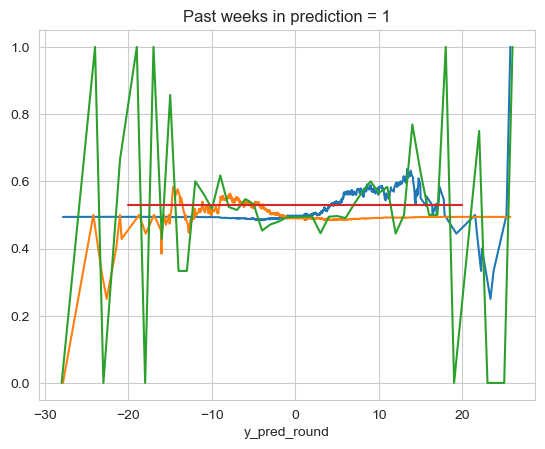

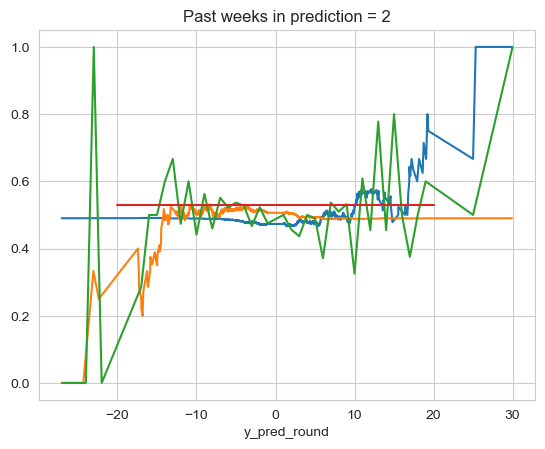

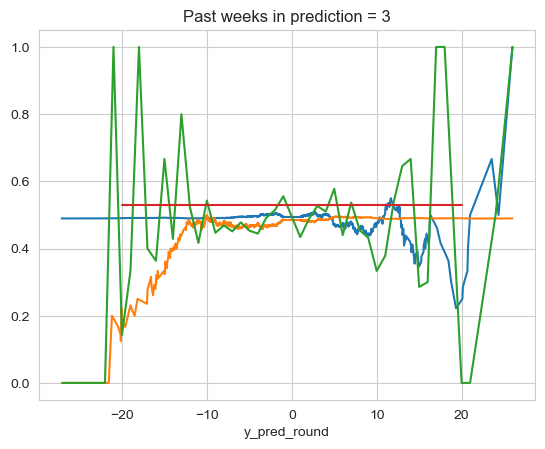

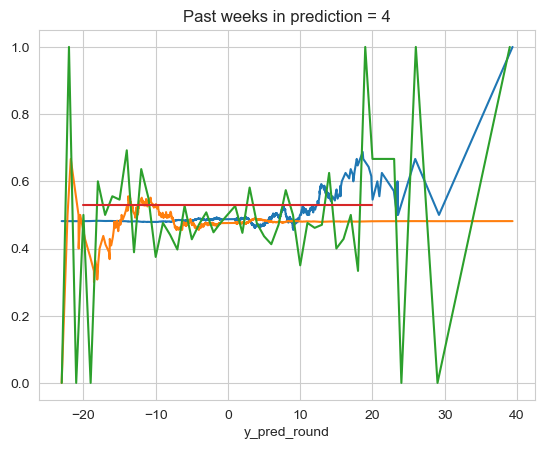

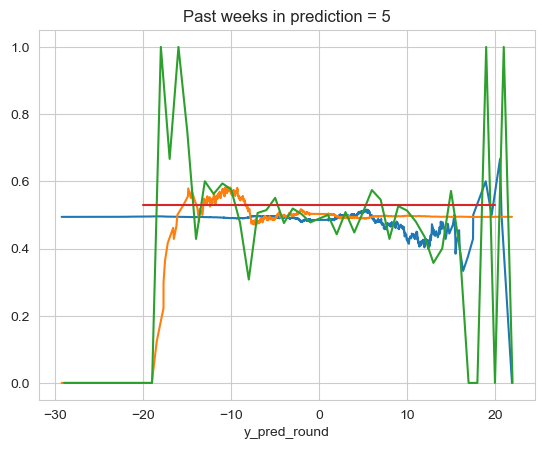

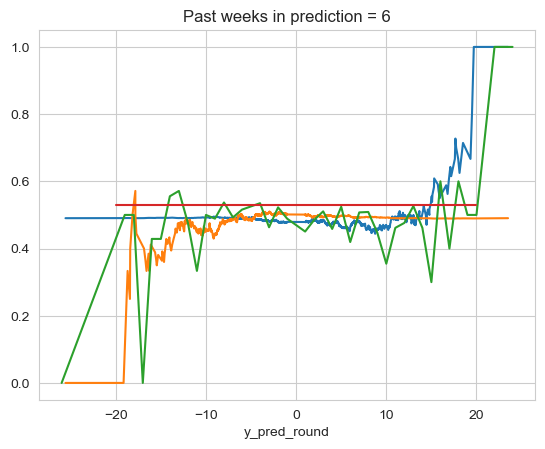

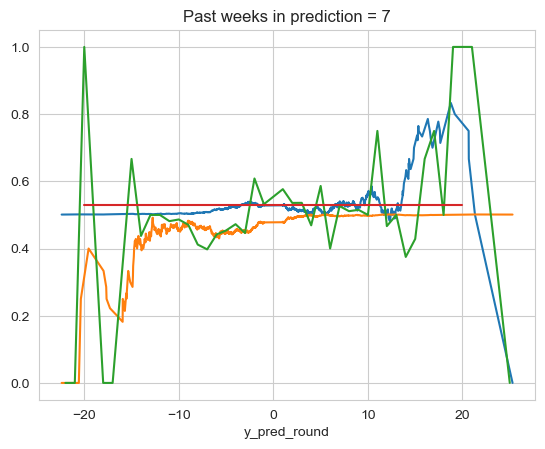

In [174]:
model = XGBRegressor(enable_categorical=True,tree_method="hist")
def genFrames(df,startweek,nweeks):
# startweek = 1
# nweeks = 5

    ytemp = df[startweek+nweeks].copy()
    ytemp = ytemp[ytemp!=0].dropna()
    Xtemp = df.loc[ytemp.index][[i for i in range(startweek,startweek+nweeks)]].copy()
    Xtemp = Xtemp.loc[ytemp.index].join(dfbets.loc[:,:,:,['Spread','OverUnder']].unstack()[startweek+nweeks])
    Xtemp['Week'] = ytemp.name
    Xtemp = Xtemp.droplevel(2).reset_index().set_index(['Team','Year','Week']).rename_axis(None,axis=1)
    Xtemp
    return Xtemp,ytemp#,year,week

genFrames(dfspread,3,4)

genFrames(dfspread,3,4)

# startweek = 1
for nweeks in range(1,8):
    # nweeks = 5
    plt.subplots()
    # X,y = genFrames(1,5)

    Xlist = [genFrames(dfspread,startweek,nweeks)[0].reset_index() for startweek in range(1,18-nweeks)]
    ylist = [genFrames(dfspread,startweek,nweeks)[1] for startweek in range(1,18-nweeks)]
    X = pd.DataFrame(np.concatenate(Xlist, axis=0))
    X.columns = ['Team','Year','Week']+list(range(1,nweeks+1))+['Spread','OverUnder']

    for col in X.columns:
        if col in ['Team','Year','Week']:
            X[col] = X[col].astype('category')
        else:
            X[col] = pd.to_numeric(X[col])
    y = pd.Series(np.concatenate(ylist, axis=0))

    X = X.drop(['Team','Year','Week'],axis=1)
    import random
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random.randint(1,100))
    model.fit(X_train,y_train)
    y_pred = pd.Series(model.predict(X_test),index=y_test.index)
    # print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

    dfpred = pd.DataFrame({'y_pred':y_pred,'y_test':y_test})
    dfpred['Win'] = np.sign(dfpred['y_pred'].round())==np.sign(dfpred['y_test'])
    dfpred['y_pred_round'] = dfpred['y_pred'].round()
    # dfpred.mean()

    dfpred[dfpred['y_pred'].abs()>1].sort_values('y_pred',ascending=False).set_index('y_pred')['Win'].expanding().mean().plot()
    dfpred[dfpred['y_pred'].abs()>1].sort_values('y_pred',ascending=True).set_index('y_pred')['Win'].expanding().mean().plot()
    dfpred[dfpred['y_pred_round']!=0].groupby('y_pred_round')['Win'].mean().rolling(1).mean().plot()
    plt.plot([-20,20],[.53,.53])
    plt.title(f'Past weeks in prediction = {nweeks}')

###  create model with this history
### for early weeks use how ever many weeks of history are available


In [175]:
thisweek = 4
nweeks = 3

Xlist = [genFrames(dfspread,startweek,nweeks)[0].reset_index() for startweek in range(1,thisweek+1-nweeks)]
ylist = [genFrames(dfspread,startweek,nweeks)[1] for startweek in range(1,thisweek+1-nweeks)]
X = pd.DataFrame(np.concatenate(Xlist, axis=0))
X.columns = ['Team','Year','Week']+list(range(1,nweeks+1))+['Spread','OverUnder']
for col in X.columns:
    if col in ['Team','Year','Week']:
        X[col] = X[col].astype('category')
    else:
        X[col] = pd.to_numeric(X[col])
y = pd.Series(np.concatenate(ylist, axis=0))
X = X.drop(['Team','Year','Week'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=random.randint(1,100)
                                                    # random_state=42
                                                    )

Xlist = [genFrames(dfval,startweek,nweeks)[0].reset_index() for startweek in range(1,thisweek+1-nweeks)]
ylist = [genFrames(dfval,startweek,nweeks)[1] for startweek in range(1,thisweek+1-nweeks)]
X_val = pd.DataFrame(np.concatenate(Xlist, axis=0))
X_val
X_val.columns = ['Team','Year','Week']+list(range(1,nweeks+1))+['Spread','OverUnder']
for col in X_val.columns:
    if col in ['Team','Year','Week']:
        X_val[col] = X_val[col].astype('category')
    else:
        X_val[col] = pd.to_numeric(X_val[col])
X_val = X_val.drop(['Team','Year','Week'],axis=1)
y_val = pd.Series(np.concatenate(ylist, axis=0))
X_test

,1,2,3,Spread,OverUnder
555,-2.5,-17.5,21.0,-7.5,45.0
468,4.0,23.5,14.5,-7.5,47.0
309,-3.0,27.0,34.5,6.5,44.0
177,1.5,2.0,20.5,-1.5,48.0
118,5.5,2.5,-3.5,-3.0,46.0
...,...,...,...,...,...
302,-8.0,9.0,-20.0,4.0,43.5
136,-0.0,3.5,7.0,-4.5,42.5
649,17.0,-6.5,-10.0,2.0,45.0
502,-19.5,5.5,-5.0,-4.5,36.0


In [176]:
model = XGBRegressor(enable_categorical=True,tree_method="hist")
from hyperopt import fmin, tpe, hp
def objective(params):

    # selected_features = [i for i, use_feature in enumerate(params['features']) if use_feature]

    # if not any(params['features']):  # Ensure at least one feature is selected
    #     return 1.0  # Penalize if no features are selected

    params = {
        'learning_rate': params['learning_rate'],
        'max_depth': int(params['max_depth']),
        'n_estimators': int(params['n_estimators']),
        'reg_lambda': params['reg_lambda'],
        'reg_alpha': params['reg_alpha'],
        'min_child_weight': params['min_child_weight'],

        # 'scale_pos_weight': params['scale_pos_weight'],
        # Add more hyperparameters
    }
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import cross_val_score
    model = XGBRegressor(**params,enable_categorical=True,tree_method="hist")
    cvscore = cross_val_score(model, X_train, y_train, cv=5)
    return 1-cvscore.mean()  # Hyperopt minimizes the objective

# Define the search space for hyperparameters
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 2, 5, 1),
    'n_estimators': hp.quniform('n_estimators', 50, 200, 10),
    'reg_lambda': hp.uniform('reg_lambda', 1, 5),
    'reg_alpha': hp.uniform('reg_alpha', 1, 5),
    'min_child_weight': hp.uniform('min_child_weight', 1, 5),
    # 'scale_pos_weight': hp.quniform('scale_pos_weight', 1, 10, 3),
    # 'features': [hp.choice(f'feature_{i}', [True, False]) for i in range(X[modelcolsall].shape[1])]

    # Add more hyperparameters to optimize
}

# Run hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20)
print("Best hyperparameters:", best)

def round_whole_numbers(d, decimal_places=2):
    rounded_dict = {}

    for key, value in d.items():
        if isinstance(value, (int, float)) and value.is_integer():
            rounded_value = int(value)
        else:
            rounded_value = value
        rounded_dict[key] = rounded_value

    return rounded_dict

bestparams = round_whole_numbers(best)

reg = XGBRegressor(**bestparams,enable_categorical=True,tree_method="hist")
# model = XGBRegressor()
reg.fit(X_train,y_train)


100%|██████████| 20/20 [00:21<00:00,  1.09s/trial, best loss: 1.0494331157616865]
Best hyperparameters: {'learning_rate': 0.018871971369697392, 'max_depth': 4.0, 'min_child_weight': 2.6263449702497987, 'n_estimators': 120.0, 'reg_alpha': 2.8805810111768833, 'reg_lambda': 4.903853385967028}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.018871971369697392,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=2.6263449702497987, missing=nan,
             monotone_constraints=None, n_estimators=120, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

In [177]:
pd.concat([pd.Series(reg.feature_importances_,index=X_train.columns).sort_values(),pd.Series(reg.feature_importances_,index=X_train.columns).sort_values().cumsum()],axis=1)

,0,1
OverUnder,0.172270,0.172270
Spread,0.173202,0.345472
1,0.197620,0.543092
3,0.211278,0.754370
2,0.245630,1.000000


In [178]:

(np.sign(reg.fit(X_train,y_train).predict(X_test))==np.sign(y_test)).mean() #.mean()

0.5

C:\Users\hogan\AppData\Local\Temp\ipykernel_18000\3743459121.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


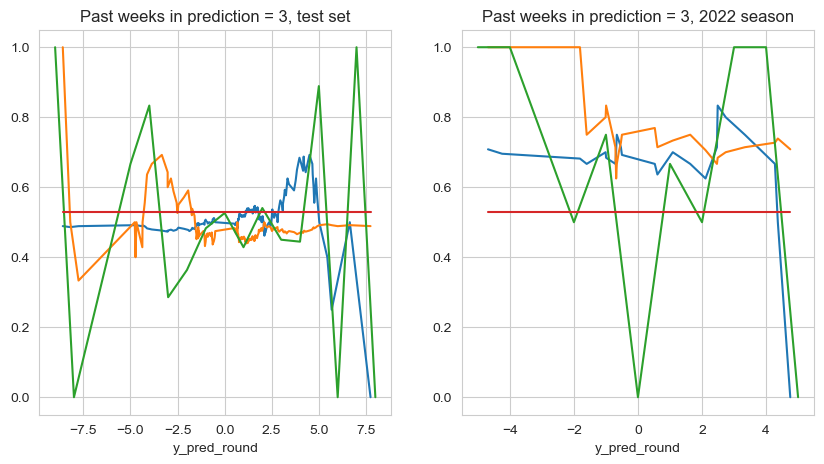

In [179]:

reg = XGBRegressor(**bestparams,enable_categorical=True,tree_method="hist")
# model = XGBRegressor()
reg.fit(X_train,y_train)
y_pred = pd.Series(reg.predict(X_test),index=y_test.index)
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

dfpred = pd.DataFrame({'y_pred':y_pred,'y_test':y_test})
dfpred['Win'] = np.sign(dfpred['y_pred'].round(1))==np.sign(dfpred['y_test'])
dfpred['y_pred_round'] = dfpred['y_pred'].round()
# dfpred.mean()

thresh = .5
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
dfpred[dfpred['y_pred'].abs()>thresh].sort_values('y_pred',ascending=False).set_index('y_pred')['Win'].expanding().mean().plot()
dfpred[dfpred['y_pred'].abs()>thresh].sort_values('y_pred',ascending=True).set_index('y_pred')['Win'].expanding().mean().plot()
dfpred.groupby('y_pred_round')['Win'].mean().rolling(1).mean().plot()
plt.plot([dfpred['y_pred'].min(),dfpred['y_pred'].max()],[.53,.53])
plt.title(f'Past weeks in prediction = {nweeks}, test set')

y_pred = pd.Series(reg.predict(X_val),index=y_val.index)
# print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

dfpred = pd.DataFrame({'y_pred':y_pred,'y_test':y_val})
dfpred['Win'] = np.sign(dfpred['y_pred'].round())==np.sign(dfpred['y_test'])
dfpred['y_pred_round'] = dfpred['y_pred'].round()
# dfpred.mean()

plt.subplot(1,2,2)
dfpred[dfpred['y_pred'].abs()>thresh].sort_values('y_pred',ascending=False).set_index('y_pred')['Win'].expanding().mean().plot()
dfpred[dfpred['y_pred'].abs()>thresh].sort_values('y_pred',ascending=True).set_index('y_pred')['Win'].expanding().mean().plot()
dfpred.groupby('y_pred_round')['Win'].mean().rolling(1).mean().plot()
plt.plot([dfpred['y_pred'].min(),dfpred['y_pred'].max()],[.53,.53])
plt.title(f'Past weeks in prediction = {nweeks}, 2022 season')

dfpredreg = dfpred.copy()

In [180]:
from sklearn.metrics import accuracy_score,f1_score,make_scorer
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp
def objective(params):

    # selected_features = [i for i, use_feature in enumerate(params['features']) if use_feature]

    # if not any(params['features']):  # Ensure at least one feature is selected
    #     return 1.0  # Penalize if no features are selected

    params = {
        'learning_rate': params['learning_rate'],
        'max_depth': int(params['max_depth']),
        'n_estimators': int(params['n_estimators']),
        'reg_lambda': params['reg_lambda'],
        'reg_alpha': params['reg_alpha'],
        'min_child_weight': params['min_child_weight'],

        # 'scale_pos_weight': params['scale_pos_weight'],
        # Add more hyperparameters
    }

    model = XGBClassifier(**params,objective="binary:logistic",enable_categorical=True,tree_method="hist")
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # accuracy = accuracy_score(y_test, y_pred)
    # f1 = f1_score(y_test, y_pred,pos_label=1)
    from sklearn.preprocessing import LabelEncoder
    y_encoded = LabelEncoder().fit_transform(np.sign(y_train))
    score = cross_val_score(model, X_train, y_encoded, cv=5)
    return 1-score.mean()  # Hyperopt minimizes the objective, so we use negative accuracy

# Define the search space for hyperparameters
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 2, 5, 1),
    'n_estimators': hp.quniform('n_estimators', 50, 200, 10),
    'reg_lambda': hp.uniform('reg_lambda', 1, 5),
    'reg_alpha': hp.uniform('reg_alpha', 1, 5),
    'min_child_weight': hp.uniform('min_child_weight', 1, 5),
    # 'scale_pos_weight': hp.quniform('scale_pos_weight', 1, 10, 3),
    # 'features': [hp.choice(f'feature_{i}', [True, False]) for i in range(X[modelcolsall].shape[1])]

    # Add more hyperparameters to optimize
}

# Run hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20)

print("Best hyperparameters:", best)
def round_whole_numbers(d, decimal_places=2):
    rounded_dict = {}

    for key, value in d.items():
        if isinstance(value, (int, float)) and value.is_integer():
            rounded_value = int(value)
        else:
            rounded_value = value
        rounded_dict[key] = rounded_value

    return rounded_dict

bestparams = round_whole_numbers(best)

100%|██████████| 20/20 [00:14<00:00,  1.37trial/s, best loss: 0.44772727272727264]
Best hyperparameters: {'learning_rate': 0.0758754055098934, 'max_depth': 3.0, 'min_child_weight': 2.7341432367124505, 'n_estimators': 180.0, 'reg_alpha': 4.260580214075036, 'reg_lambda': 4.250680526744624}


C:\Users\hogan\AppData\Local\Temp\ipykernel_18000\2581920212.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


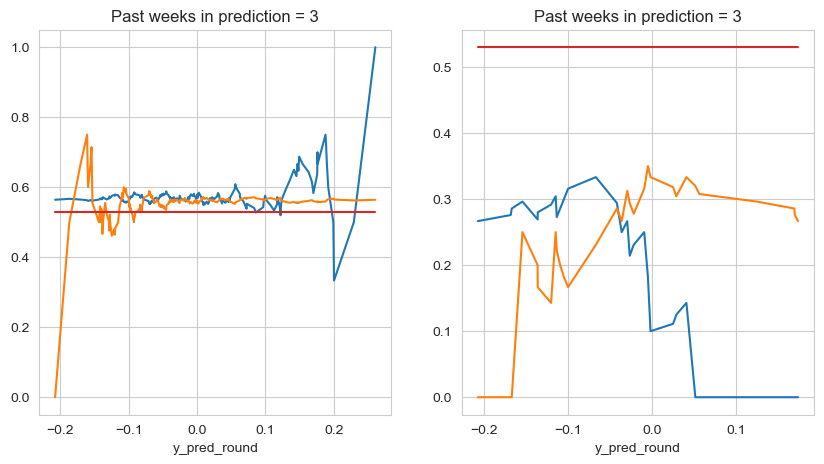

In [181]:

clas = XGBClassifier(**bestparams,objective="binary:logistic",enable_categorical=True,tree_method="hist")
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(np.sign(y_train))
clas.fit(X_train,y_encoded)
y_pred = pd.DataFrame(clas.predict_proba(X_test),index=y_test.index)[0]
dfpred = pd.DataFrame({'y_pred':y_pred-.5,'y_test':np.sign(y_test)})
dfpred['Win'] = np.sign(dfpred['y_pred'])==dfpred['y_test']
dfpred['y_pred_round'] = dfpred['y_pred'].round()
# dfpred.mean()

thresh = 0
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
dfpred[dfpred['y_pred'].abs()>thresh].sort_values('y_pred',ascending=False).set_index('y_pred')['Win'].expanding().mean().plot()
dfpred[dfpred['y_pred'].abs()>thresh].sort_values('y_pred',ascending=True).set_index('y_pred')['Win'].expanding().mean().plot()
dfpred.groupby('y_pred_round')['Win'].mean().rolling(1).mean().plot()
plt.plot([dfpred['y_pred'].min(),dfpred['y_pred'].max()],[.53,.53])
plt.title(f'Past weeks in prediction = {nweeks}')

y_pred = pd.DataFrame(clas.predict_proba(X_val),index=y_val.index)[0]
dfpred = pd.DataFrame({'y_pred':y_pred-.5,'y_test':np.sign(y_val)})
dfpred['Win'] = np.sign(dfpred['y_pred'])==dfpred['y_test']
dfpred['y_pred_round'] = dfpred['y_pred'].round()

plt.subplot(1,2,2)
dfpred[dfpred['y_pred'].abs()>thresh].sort_values('y_pred',ascending=False).set_index('y_pred')['Win'].expanding().mean().plot()
dfpred[dfpred['y_pred'].abs()>thresh].sort_values('y_pred',ascending=True).set_index('y_pred')['Win'].expanding().mean().plot()
dfpred.groupby('y_pred_round')['Win'].mean().rolling(1).mean().plot()
plt.plot([dfpred['y_pred'].min(),dfpred['y_pred'].max()],[.53,.53])
plt.title(f'Past weeks in prediction = {nweeks}')

dfpredclas = dfpred.copy()

In [171]:
X_val

,1,2,3,OverUnder,Spread
0,-17.0,11.5,-4.5,1.0,43.5
1,4.5,6.0,5.0,1.0,48.5
2,-3.0,-4.0,10.0,-1.0,43.5
3,15.5,-7.0,0.0,3.0,39.5
4,-10.0,-10.0,8.5,-4.0,49.0
5,3.0,-7.5,7.5,-1.0,48.5
6,-13.5,10.0,8.0,-3.0,41.0
7,-7.0,-3.0,2.5,2.5,45.5
8,2.5,8.0,2.5,-3.5,48.5
9,-14.0,7.0,3.5,-9.5,40.0


In [170]:
clas = XGBClassifier(objective="binary:logistic",enable_categorical=True,tree_method="hist")
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(np.sign(y_train))
clas.fit(X_train,y_encoded)
y_pred = pd.DataFrame(clas.predict_proba(X_test),index=y_test.index)[0]
dfpred = pd.DataFrame({'y_pred':y_pred-.5,'y_test':np.sign(y_test)})
dfpred['Win'] = np.sign(dfpred['y_pred'])==dfpred['y_test']
dfpred['y_pred_round'] = dfpred['y_pred'].round()
dfpred.mean()

y_pred         -0.011471
y_test          0.073394
Win             0.500000
y_pred_round    0.000000
dtype: float64

In [149]:
dfpredreg.columns = ['y_pred_reg','y_test_reg','Win_reg','y_pred_round_reg']
dfpredclas.columns = ['y_pred_clas','y_test_clas','Win_clas','y_pred_round_clas']
dfboth = pd.concat([dfpredreg,dfpredclas],axis=1)

dfboth[(-dfboth['y_pred_reg'].between(dfboth['y_pred_reg'].quantile(.2),dfboth['y_pred_reg'].quantile(.8)))&(-dfboth['y_pred_clas'].between(dfboth['y_pred_clas'].quantile(.2),dfboth['y_pred_clas'].quantile(.8)))]

,y_pred_reg,y_test_reg,Win_reg,y_pred_round_reg,y_pred_clas,y_test_clas,Win_clas,y_pred_round_clas
0,2.005867,11.0,True,2.0,-0.162935,1.0,False,-0.0
3,-2.254375,-5.0,True,-2.0,0.193918,-1.0,False,0.0
13,-2.173373,11.5,False,-2.0,0.116586,1.0,True,0.0
18,-2.635655,-1.0,True,-3.0,0.142375,-1.0,False,0.0
22,2.005867,7.0,True,2.0,-0.174520,1.0,False,-0.0
27,-2.258091,-11.5,True,-2.0,0.210297,-1.0,False,0.0


In [33]:
import pandas as pd
import numpy as np
import datetime

## import past spreads

In [3]:
dfseasonspreads = pd.read_csv('data/Season_spreads.csv',index_col=0)
dfseasonspreads

,opponent,spread,score,diff,Week,Year,spreadscore,coverprob,predspread
Arizona Cardinals,Washington Commanders,7.0,16.0,-4.0,1,2023,3.0,NaN,NaN
Atlanta Falcons,Carolina Panthers,-3.5,24.0,14.0,1,2023,10.5,NaN,NaN
Baltimore Ravens,Houston Texans,-9.5,25.0,16.0,1,2023,6.5,NaN,NaN
Buffalo Bills,New York Jets,-2.5,16.0,-6.0,1,2023,-8.5,NaN,NaN
Carolina Panthers,Atlanta Falcons,3.5,10.0,-14.0,1,2023,-10.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...
San Francisco 49ers,NaN,NaN,NaN,NaN,2,2023,NaN,0.471402,-4.576632
Seattle Seahawks,NaN,NaN,NaN,NaN,2,2023,NaN,0.564059,2.564864
Tampa Bay Buccaneers,NaN,NaN,NaN,NaN,2,2023,NaN,0.490795,7.881182
Tennessee Titans,NaN,NaN,NaN,NaN,2,2023,NaN,0.545528,-6.536362


### get last weeks game results through api

In [4]:
# [game for game in json.loads(data.decode("utf-8"))['response'] if
#  game['teams']['away']['name'] == 'Buffalo Bills' and game['game']['stage'] == 'Regular Season']
import http.client
import json

conn = http.client.HTTPSConnection("v1.american-football.api-sports.io")
scoreskey = '40c091a0954eb4e610a4cc8fce5cefd7'
headers = {
    'x-rapidapi-host': "v1.american-football.api-sports.io",
    'x-rapidapi-key': scoreskey
}

conn.request("GET", "/games?league=1&season=2023", headers=headers)

res = conn.getresponse()
data = res.read()

In [13]:
data

b'{"get":"games","parameters":{"league":"1","season":"2023"},"errors":[],"results":332,"response":[{"game":{"id":7804,"stage":"Pre Season","week":"Hall of Fame Weekend","date":{"timezone":"UTC","date":"2023-08-04","time":"00:00","timestamp":1691107200},"venue":{"name":"Tom Benson Hall of Fame Stadium","city":"Canton"},"status":{"short":"FT","long":"Finished","timer":null}},"league":{"id":1,"name":"NFL","season":"2023","logo":"https:\\/\\/media-4.api-sports.io\\/american-football\\/leagues\\/1.png","country":{"name":"USA","code":"US","flag":"https:\\/\\/media-4.api-sports.io\\/flags\\/us.svg"}},"teams":{"home":{"id":9,"name":"Cleveland Browns","logo":"https:\\/\\/media-4.api-sports.io\\/american-football\\/teams\\/9.png"},"away":{"id":13,"name":"New York Jets","logo":"https:\\/\\/media-4.api-sports.io\\/american-football\\/teams\\/13.png"}},"scores":{"home":{"quarter_1":0,"quarter_2":7,"quarter_3":7,"quarter_4":7,"overtime":null,"total":21},"away":{"quarter_1":6,"quarter_2":10,"quarter_

### should delete later

In [1030]:
# dfseasonspreads = pd.read_csv('data/Season_spreads Week 1.csv',index_col=0)
# dfseasonspreads = dfseasonspreads[['Week 1 Opponent','Week 1 spread']]
# dfseasonspreads.columns = ['opponent','spread']
# dfseasonspreads

,opponent,spread
Arizona Cardinals,Washington Commanders,7.0
Atlanta Falcons,Carolina Panthers,-3.5
Baltimore Ravens,Houston Texans,-9.5
Buffalo Bills,New York Jets,-2.5
Carolina Panthers,Atlanta Falcons,3.5
Chicago Bears,Green Bay Packers,-1.5
Cincinnati Bengals,Cleveland Browns,-2.0
Cleveland Browns,Cincinnati Bengals,2.0
Dallas Cowboys,New York Giants,-3.0
Denver Broncos,Las Vegas Raiders,-3.0


### extract game data to compare with predictions

In [14]:
games

[{'game': {'id': 7532,
   'stage': 'Regular Season',
   'week': 'Week 1',
   'date': {'timezone': 'UTC',
    'date': '2023-09-08',
    'time': '00:20',
    'timestamp': 1694132400},
   'venue': {'name': 'GEHA Field at Arrowhead Stadium', 'city': 'Kansas City'},
   'status': {'short': 'FT', 'long': 'Finished', 'timer': None}},
  'league': {'id': 1,
   'name': 'NFL',
   'season': '2023',
   'logo': 'https://media-4.api-sports.io/american-football/leagues/1.png',
   'country': {'name': 'USA',
    'code': 'US',
    'flag': 'https://media-4.api-sports.io/flags/us.svg'}},
  'teams': {'home': {'id': 17,
    'name': 'Kansas City Chiefs',
    'logo': 'https://media-4.api-sports.io/american-football/teams/17.png'},
   'away': {'id': 7,
    'name': 'Detroit Lions',
    'logo': 'https://media-4.api-sports.io/american-football/teams/7.png'}},
  'scores': {'home': {'quarter_1': 0,
    'quarter_2': 14,
    'quarter_3': 3,
    'quarter_4': 3,
    'overtime': None,
    'total': 20},
   'away': {'quarte

In [107]:
dfgd = pd.read_csv('data/Season_spreads Week 2.csv',index_col=0)
dfgd

,Week 1 spread,Week 1 Opponent,Week 1 score,Week 1 diff,Week 1 spreadscore,Week 2 spread,Week 2 spread wrong probably,Week 2 coverprob,Week 2 predspread,Week 2 Opponent,Week 2 coverprob_diff,Week 2 predspread_diff,Week 2 Opponent.1,Week 2 Order
Arizona Cardinals,7.0,Washington Commanders,16,-4,3.0,4.5,4.5,0.526658,0.149083,New York Giants,0.013880,0.050129,New York Giants,10
Atlanta Falcons,-3.5,Carolina Panthers,24,14,10.5,-3.0,-3.0,0.483792,-4.539846,Green Bay Packers,0.025524,-6.921441,Green Bay Packers,1
Baltimore Ravens,-9.5,Houston Texans,25,16,6.5,3.5,3.5,0.500537,-4.365124,Cincinnati Bengals,-0.093996,1.323625,Cincinnati Bengals,3
Buffalo Bills,-2.5,New York Jets,16,-6,-8.5,-7.5,-7.5,0.499419,2.562620,Las Vegas Raiders,-0.011539,4.849786,Las Vegas Raiders,2
Carolina Panthers,3.5,Atlanta Falcons,10,-14,-10.5,3.0,3.0,0.531694,0.263147,New Orleans Saints,-0.066440,5.192412,New Orleans Saints,14
Chicago Bears,-1.5,Green Bay Packers,20,-18,-19.5,2.5,2.5,0.594533,-7.578706,Tampa Bay Buccaneers,0.103738,-15.459888,Tampa Bay Buccaneers,6
Cincinnati Bengals,-2.0,Cleveland Browns,3,-21,-23.0,-3.5,-3.5,0.594533,-5.688749,Baltimore Ravens,0.093996,-1.323625,Baltimore Ravens,3
Cleveland Browns,2.0,Cincinnati Bengals,24,21,23.0,-2.5,-2.5,0.458267,2.221873,Pittsburgh Steelers,-0.105791,7.095149,Pittsburgh Steelers,15
Dallas Cowboys,-3.0,New York Giants,40,40,37.0,-10.5,-10.5,0.516996,-1.659372,New York Jets,0.042969,5.756338,New York Jets,11
Denver Broncos,-3.0,Las Vegas Raiders,16,-1,-4.0,-3.5,5.5,0.637973,5.862730,Washington Commanders,0.050261,10.004129,Washington Commanders,12


In [108]:
dfseasonspreads.loc[dfseasonspreads['Week']==2,'spread'] = dfgd['Week 2 spread'].values
dfseasonspreads.loc[dfseasonspreads['Week']==2,'opponent'] = dfgd['Week 2 Opponent'].values
dfseasonspreads

,opponent,spread,score,diff,Week,Year,spreadscore,coverprob,predspread
Arizona Cardinals,Washington Commanders,7.0,28,-3,1,2023,1.5,NaN,NaN
Atlanta Falcons,Carolina Panthers,-3.5,25,1,1,2023,-2.0,NaN,NaN
Baltimore Ravens,Houston Texans,-9.5,27,3,1,2023,6.5,NaN,NaN
Buffalo Bills,New York Jets,-2.5,38,28,1,2023,20.5,NaN,NaN
Carolina Panthers,Atlanta Falcons,3.5,17,-3,1,2023,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
San Francisco 49ers,Los Angeles Rams,-7.5,30,7,2,2023,-0.5,0.471402,-4.576632
Seattle Seahawks,Detroit Lions,4.5,37,6,2,2023,10.5,0.564059,2.564864
Tampa Bay Buccaneers,Chicago Bears,-2.5,27,10,2,2023,7.5,0.490795,7.881182
Tennessee Titans,Los Angeles Chargers,2.5,27,3,2,2023,5.5,0.545528,-6.536362


In [109]:
games = [game for game in json.loads(data.decode("utf-8"))['response'] if game['game']['stage']=='Regular Season' and game['game']['status']['short']!='NS']
weeks = list(set([game['game']['week'] for game in games]))
weeks_num = [int(week.split(' ')[1]) for week in weeks]
lastweekstr = 'week'+str(max(weeks_num))
nextweekstr = 'week'+str(max(weeks_num)+1)
print(lastweekstr,nextweekstr)
gamescores = {}
gamescorediffs = {}
opponent = {}
for game in games:
    if game['game']['week']==weeks[0]:
        gamescores[game['teams']['home']['name']] = game['scores']['home']['total']
        gamescores[game['teams']['away']['name']] = game['scores']['away']['total']
        gamescorediffs[game['teams']['home']['name']] = game['scores']['home']['total']-game['scores']['away']['total']
        gamescorediffs[game['teams']['away']['name']] = game['scores']['away']['total']-game['scores']['home']['total']
        # opponent[game['teams']['home']['name']] = game['teams']['away']['name']
        # opponent[game['teams']['away']['name']] = game['teams']['home']['name']

dfgameresults = pd.concat([
                           pd.Series(gamescores,name='score'),
                            pd.Series(gamescorediffs,name='diff')
                           ],axis=1)
dfgameresults
dfseasonspreads[dfseasonspreads['Week']==weeks_num[0]]
# dfgameresults['Week'] = weeks_num[-1]
# dfgameresults['Year'] = 2023

dfseasonspreads_lastweek = dfseasonspreads[dfseasonspreads['Week']==weeks_num[0]].drop(['diff','score'],axis=1).merge(dfgameresults,left_index=True,right_index=True,how='left')
dfseasonspreads_lastweek['spreadscore'] = dfseasonspreads_lastweek['diff'] + dfseasonspreads_lastweek['spread']
dfseasonspreads_lastweek

week2 week3


,opponent,spread,Week,Year,spreadscore,coverprob,predspread,score,diff
Arizona Cardinals,New York Giants,4.5,2,2023,1.5,0.526658,0.149083,28,-3
Atlanta Falcons,Green Bay Packers,-3.0,2,2023,-2.0,0.483792,-4.539846,25,1
Baltimore Ravens,Cincinnati Bengals,3.5,2,2023,6.5,0.500537,-4.365124,27,3
Buffalo Bills,Las Vegas Raiders,-7.5,2,2023,20.5,0.499419,2.562620,38,28
Carolina Panthers,New Orleans Saints,3.0,2,2023,0.0,0.531694,0.263147,17,-3
Chicago Bears,Tampa Bay Buccaneers,2.5,2,2023,-7.5,0.594533,-7.578706,17,-10
Cincinnati Bengals,Baltimore Ravens,-3.5,2,2023,-6.5,0.594533,-5.688749,24,-3
Cleveland Browns,Pittsburgh Steelers,-2.5,2,2023,-6.5,0.458267,2.221873,22,-4
Dallas Cowboys,New York Jets,-10.5,2,2023,9.5,0.516996,-1.659372,30,20
Denver Broncos,Washington Commanders,-3.5,2,2023,-5.5,0.637973,5.862730,33,-2


### update seasonspreads with last weeks results

In [110]:
dfseasonspreads.loc[dfseasonspreads_lastweek['Week']==weeks_num[0],'score'] = dfseasonspreads_lastweek['score']
dfseasonspreads.loc[dfseasonspreads_lastweek['Week']==weeks_num[0],'diff'] = dfseasonspreads_lastweek['diff']
dfseasonspreads.loc[dfseasonspreads_lastweek['Week']==weeks_num[0],'spreadscore'] = dfseasonspreads_lastweek['spreadscore']
dfseasonspreads

,opponent,spread,score,diff,Week,Year,spreadscore,coverprob,predspread
Arizona Cardinals,Washington Commanders,7.0,28,-3,1,2023,1.5,NaN,NaN
Atlanta Falcons,Carolina Panthers,-3.5,25,1,1,2023,-2.0,NaN,NaN
Baltimore Ravens,Houston Texans,-9.5,27,3,1,2023,6.5,NaN,NaN
Buffalo Bills,New York Jets,-2.5,38,28,1,2023,20.5,NaN,NaN
Carolina Panthers,Atlanta Falcons,3.5,17,-3,1,2023,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
San Francisco 49ers,Los Angeles Rams,-7.5,30,7,2,2023,-0.5,0.471402,-4.576632
Seattle Seahawks,Detroit Lions,4.5,37,6,2,2023,10.5,0.564059,2.564864
Tampa Bay Buccaneers,Chicago Bears,-2.5,27,10,2,2023,7.5,0.490795,7.881182
Tennessee Titans,Los Angeles Chargers,2.5,27,3,2,2023,5.5,0.545528,-6.536362


### get next weeks game spreads through api

In [28]:
import requests

API_KEY = '685f879ea79649c48a2ed648a7876f1f'
url = f'https://api.the-odds-api.com/v4/sports/americanfootball_nfl/odds?regions=us&markets=h2h,spreads,totals&oddsFormat=american&apiKey={API_KEY}'

r = requests.get(url)

r = requests.get(url)
if r.status_code == 200:
    # for p in r.content:
    #     print(p)
  spreaddata = json.loads(r.content)
  print(spreaddata)

[{'id': '47b49faf45f8a39f9910f004a79ff360', 'sport_key': 'americanfootball_nfl', 'sport_title': 'NFL', 'commence_time': '2023-09-22T00:15:00Z', 'home_team': 'San Francisco 49ers', 'away_team': 'New York Giants', 'bookmakers': [{'key': 'draftkings', 'title': 'DraftKings', 'last_update': '2023-09-20T01:00:31Z', 'markets': [{'key': 'h2h', 'last_update': '2023-09-20T01:00:31Z', 'outcomes': [{'name': 'New York Giants', 'price': 410}, {'name': 'San Francisco 49ers', 'price': -550}]}, {'key': 'spreads', 'last_update': '2023-09-20T01:00:31Z', 'outcomes': [{'name': 'New York Giants', 'price': -108, 'point': 10.0}, {'name': 'San Francisco 49ers', 'price': -112, 'point': -10.0}]}, {'key': 'totals', 'last_update': '2023-09-20T01:00:31Z', 'outcomes': [{'name': 'Over', 'price': -112, 'point': 44.5}, {'name': 'Under', 'price': -108, 'point': 44.5}]}]}, {'key': 'williamhill_us', 'title': 'William Hill (US)', 'last_update': '2023-09-20T00:59:45Z', 'markets': [{'key': 'h2h', 'last_update': '2023-09-20T0

### extract next weeks spreads

In [113]:
# import datetime
# today  = datetime.datetime.now().date()
# today + datetime.timedelta(days=7)
date_format = '%Y-%m-%dT%H:%M:%SZ'
datetime.datetime.strptime(spreaddata[0]['commence_time'],date_format) < datetime.datetime.today() + datetime.timedelta(days=7)
nextweek = [game for game in spreaddata if datetime.datetime.strptime(game['commence_time'],date_format) < datetime.datetime.today() + datetime.timedelta(days=7)]
games = [game['bookmakers'][0]['markets'] for game in nextweek] #+ [game['bookmakers'][1]['markets'] for game in thisweek]

nextweek_spreads = {}
order = {}
opponent = {}
for i, game in enumerate(games):
    for bet in game:
        if bet['key']=='spreads':
            nextweek_spreads[bet['outcomes'][0]['name']] = bet['outcomes'][0]['point']
            nextweek_spreads[bet['outcomes'][1]['name']] = bet['outcomes'][1]['point']
            order[bet['outcomes'][0]['name']] = i
            order[bet['outcomes'][1]['name']] = i
            opponent[bet['outcomes'][0]['name']] = bet['outcomes'][1]['name']
            opponent[bet['outcomes'][1]['name']] = bet['outcomes'][0]['name']
nextweek_spreads
dfseasonspreads_nextweek = pd.concat([pd.Series(nextweek_spreads,name='spread'),
                                      pd.Series(order,name='order'),
                                      pd.Series(opponent,name='opponent')
                                      ],axis=1)
dfseasonspreads_nextweek

,spread,order,opponent
New York Giants,10.0,0,San Francisco 49ers
San Francisco 49ers,-10.0,0,New York Giants
Atlanta Falcons,3.0,1,Detroit Lions
Detroit Lions,-3.0,1,Atlanta Falcons
Baltimore Ravens,-7.5,2,Indianapolis Colts
Indianapolis Colts,7.5,2,Baltimore Ravens
Buffalo Bills,-6.5,3,Washington Commanders
Washington Commanders,6.5,3,Buffalo Bills
Denver Broncos,6.5,4,Miami Dolphins
Miami Dolphins,-6.5,4,Denver Broncos


### train models

In [82]:
def genData(nextweek,nweeks):

    def genFrames(df,startweek,nweeks):
        ytemp = df[startweek+nweeks]
        ytemp = ytemp[ytemp!=0].dropna()
        Xtemp = df[[i for i in range(startweek,startweek+nweeks)]].loc[ytemp.index]
        Xtemp['Week'] = ytemp.name
        Xtemp = Xtemp.droplevel(2).reset_index().set_index(['Team','Year','Week']).rename_axis(None,axis=1)
        # Xtemp['Team'] = Xtemp['Team'].astype('category')
        # Xtemp['Year'] = Xtemp['Year'].astype('category')
        return Xtemp,ytemp#,year,week
    dfspread = pd.read_csv('data/dfspread.csv',index_col=[0,1,2])
    dfspread.columns = [int(col) if col not in ['Team','Year','teamyearid'] else col for col in dfspread.columns]
    dfmodel = dfspread.loc[pd.IndexSlice[2022] != dfspread.index.get_level_values('Year')]
    dfval = dfspread.loc[pd.IndexSlice[2022] == dfspread.index.get_level_values('Year')]

    # thisweek = weeks_num[0]+1
    # nweeks = min(5,weeks_num[0])

    Xlist = [genFrames(dfmodel,startweek,nweeks)[0].reset_index() for startweek in range(1,nextweek+1-nweeks)]
    ylist = [genFrames(dfmodel,startweek,nweeks)[1] for startweek in range(1,nextweek+1-nweeks)]
    X = pd.DataFrame(np.concatenate(Xlist, axis=0))
    X.columns = ['Team','Year','Week']+list(range(1,nweeks+1))
    for col in X.columns:
        if col in ['Team','Year','Week']:
            X[col] = X[col].astype('category')
        else:
            X[col] = pd.to_numeric(X[col])
    y = pd.Series(np.concatenate(ylist, axis=0))

    from sklearn.model_selection import train_test_split
    import random
    from sklearn.model_selection import cross_val_score
    from xgboost import XGBRegressor,XGBClassifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                        random_state=random.randint(1,100)
                                                        # random_state=42
                                                        )

    Xlist = [genFrames(dfval,startweek,nweeks)[0].reset_index() for startweek in range(1,nextweek+1-nweeks)]
    ylist = [genFrames(dfval,startweek,nweeks)[1] for startweek in range(1,nextweek+1-nweeks)]
    X_val = pd.DataFrame(np.concatenate(Xlist, axis=0))
    X_val.columns = ['Team','Year','Week']+list(range(1,nweeks+1))
    for col in X_val.columns:
        if col in ['Team','Year','Week']:
            X_val[col] = X_val[col].astype('category')
        else:
            X_val[col] = pd.to_numeric(X_val[col])
    y_val = pd.Series(np.concatenate(ylist, axis=0))

    return X_train, X_test, y_train, y_test,X_val,y_val

nextweek = weeks_num[0]+1
nweeks = min(5,weeks_num[0])
X_train, X_test, y_train, y_test,X_val,y_val = genData(nextweek,nweeks)

def fitxgbModel(modeltype):
    from hyperopt import fmin, tpe, hp
    def objective(params):

        # selected_features = [i for i, use_feature in enumerate(params['features']) if use_feature]

        # if not any(params['features']):  # Ensure at least one feature is selected
        #     return 1.0  # Penalize if no features are selected

        params = {
            'learning_rate': params['learning_rate'],
            'max_depth': int(params['max_depth']),
            'n_estimators': int(params['n_estimators']),
            'reg_lambda': params['reg_lambda'],
            'reg_alpha': params['reg_alpha'],
            'min_child_weight': params['min_child_weight'],

            # 'scale_pos_weight': params['scale_pos_weight'],
            # Add more hyperparameters
        }
        modeldict = {'reg':XGBRegressor,'clas':XGBClassifier}
        model = modeldict[modeltype](**params,enable_categorical=True,tree_method="hist")
        from sklearn.preprocessing import LabelEncoder
        y_encoded = LabelEncoder().fit_transform(np.sign(y_train))
        # model = XGBRegressor(**params,enable_categorical=True,tree_method="hist")
        if modeltype=='clas':
            cvscore = cross_val_score(model, X_train, y_encoded, cv=5)
        else:
            cvscore = cross_val_score(model, X_train, y_train, cv=5)

        return 1-cvscore.mean()  # Hyperopt minimizes the objective, so we use negative accuracy

    # Define the search space for hyperparameters
    space = {
        'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
        'max_depth': hp.quniform('max_depth', 2, 5, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 200, 10),
        'reg_lambda': hp.uniform('reg_lambda', 1, 5),
        'reg_alpha': hp.uniform('reg_alpha', 1, 5),
        'min_child_weight': hp.uniform('min_child_weight', 1, 5),
        # 'scale_pos_weight': hp.quniform('scale_pos_weight', 1, 10, 3),
        # 'features': [hp.choice(f'feature_{i}', [True, False]) for i in range(X[modelcolsall].shape[1])]

        # Add more hyperparameters to optimize
    }

    # Run hyperparameter optimization
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20)
    print("Best hyperparameters:", best)

    def round_whole_numbers(d, decimal_places=2):
        rounded_dict = {}

        for key, value in d.items():
            if isinstance(value, (int, float)) and value.is_integer():
                rounded_value = int(value)
            else:
                rounded_value = value
            rounded_dict[key] = rounded_value

        return rounded_dict

    bestparams = round_whole_numbers(best)
    return bestparams


## create training data
nextweek = weeks_num[0]+1
nweeks = min(5,weeks_num[0])
X_train, X_test, y_train, y_test,X_val,y_val = genData(nextweek,nweeks)

## fit best parameters for  reg and clas models
bestparamsreg = fitxgbModel('reg')
bestparamsclas = fitxgbModel('clas')

## train xgb models
reg = XGBRegressor(**bestparams,enable_categorical=True,tree_method="hist")
reg.fit(X_train,y_train)
clas = XGBClassifier(**bestparams,enable_categorical=True,tree_method="hist")
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(np.sign(y_train))
clas.fit(X_train,y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01581400722017967,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1.188026724345864, missing=nan,
              monotone_constraints=None, n_estimators=170, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [6]:
mongo_db = 'withTheSpread'  # Replace with your desired database name
mongo_collection = 'season_spreads'  # Replace with your desired collection name
from api_calls import get_db,mongoConn
client = mongoConn()
dfseasonspreads = get_db(client,mongo_db,mongo_collection)
dfseasonspreads = dfseasonspreads.set_index(['Team'],drop=True).drop(['_id'],axis=1)

Pinged your deployment. You successfully connected to MongoDB!


In [8]:

dfseasonspreads
dfplot = dfseasonspreads.copy()
def checkcover(x,metric):
    if 'pred' in metric:
        result = np.nan if (pd.isna(x[[metric,'spreadscore']]).any() or np.sign(x['spreadscore'])==0) else np.sign(x['spreadscore'])==np.sign(x[metric])
    elif 'cover' in metric:
        result = np.nan if (pd.isna(x[[metric,'spreadscore']]).any() or np.sign(x['spreadscore'])==0) else np.sign(x['spreadscore'])==np.sign(x[metric]-.5)
    else:
        return 'Not valid metric'
    return result

dfplot['predspread_diff'+'_cover'] = dfplot.apply(lambda row: checkcover(row,'predspread_diff'),axis=1).astype(bool)
dfplot

NameError: name 'np' is not defined

In [39]:
dfseasonspreads_mistake = pd.read_csv('data/Season_spreads week4.csv',index_col=[0])

In [41]:
dfseasonspreads_mistake.index

Index(['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens',
       'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears',
       'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys',
       'Denver Broncos', 'Detroit Lions', 'Green Bay Packers',
       'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars',
       'Kansas City Chiefs', 'Las Vegas Raiders', 'Los Angeles Chargers',
       'Los Angeles Rams', 'Miami Dolphins', 'Minnesota Vikings',
       'New England Patriots', 'New Orleans Saints', 'New York Giants',
       'New York Jets', 'Philadelphia Eagles', 'Pittsburgh Steelers',
       'San Francisco 49ers', 'Seattle Seahawks', 'Tampa Bay Buccaneers',
       'Tennessee Titans', 'Washington Commanders'],
      dtype='object', name='Team')

In [42]:
weeks_num

NameError: name 'weeks_num' is not defined